Compare catwise masks constructed in Python (see `../Secrest/CatWISEdipole/CatWISE_Dipole_Results.ipynb`) and catwise masks constructed in TOPCAT, plus number of pixels in inital/secondary masking.

Check masks with different masking radii

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.coordinates import SkyCoord, Angle
import astropy.units as u
from astropy.io import fits
from astropy.table import Table
import healpy as hp
import os
import sys
sys.path.insert(0, '/home/aew492/lss-dipoles')
import tools

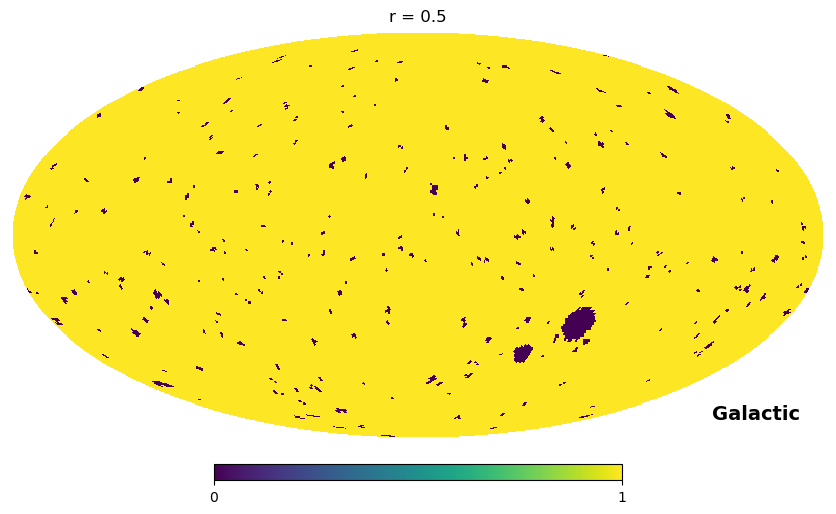

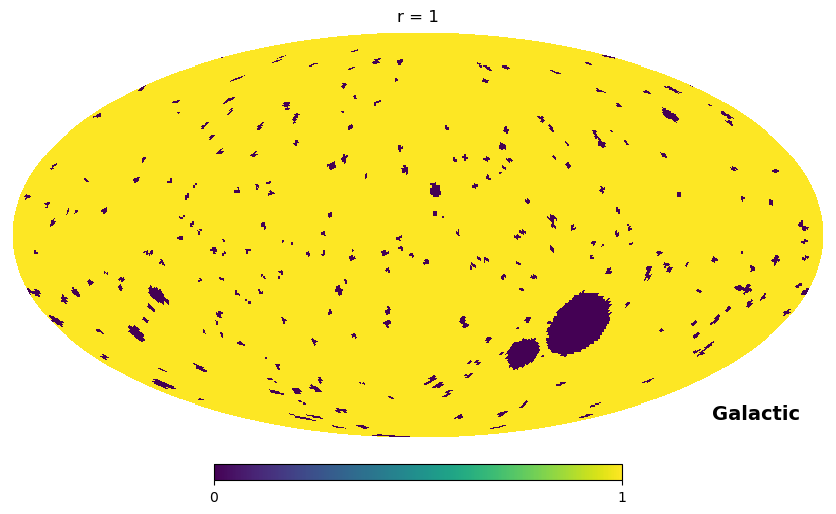

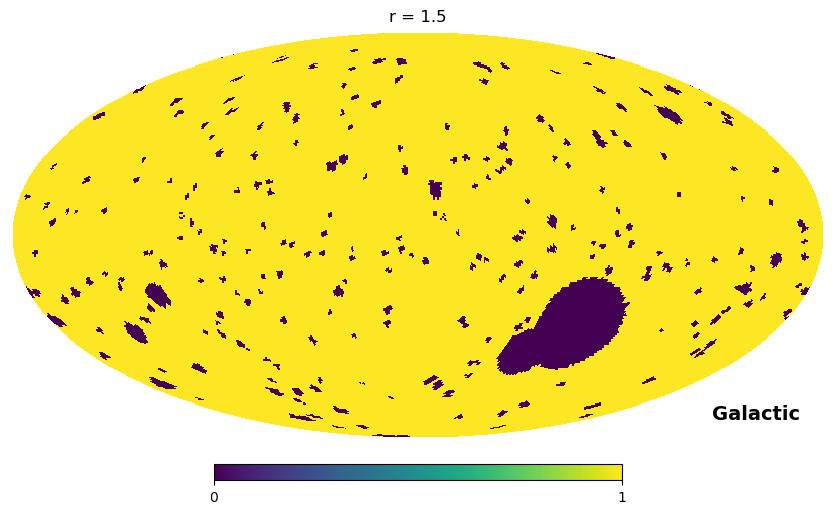

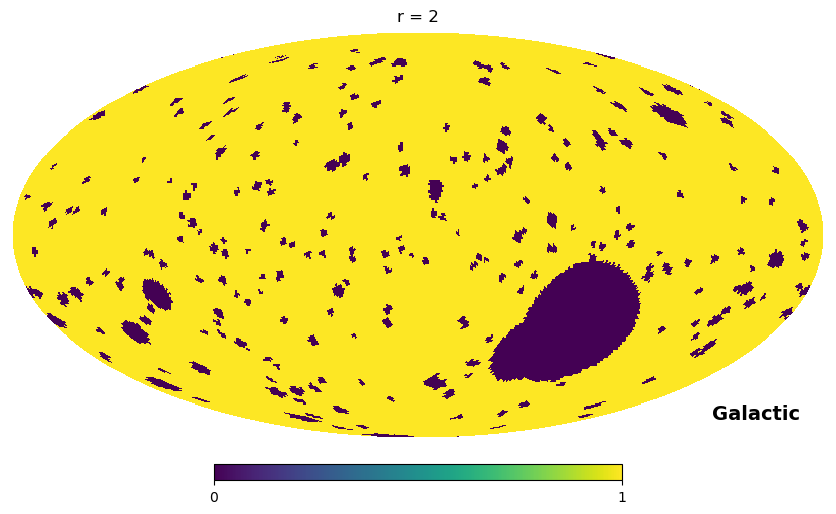

In [3]:
factors = [0.5, 1, 1.5, 2]
for i, factor in enumerate(factors):
    with fits.open(f'/scratch/aew492/quasars/catalogs/masks/mask_master_hpx_r{factor:.1f}.fits') as hdu:
        hpxmap = hdu[0].data
    hp.mollview(hpxmap, coord=['C','G'], title=f'r = {factor}')

In [4]:
catmap = tools.load_catalog_as_map('/scratch/aew492/quasars/catalogs/catwise_agns/catwise_agns_master.fits')

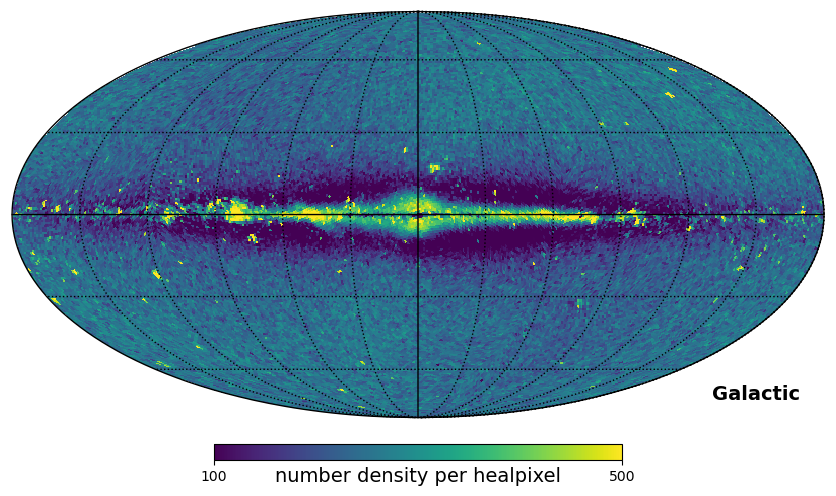

In [5]:
catmap_ = np.copy(catmap)
catmap_[catmap <= 0.] = hp.UNSEEN
tools.mollview(catmap_, coord=['C','G'], norm='log', min=100, max=500)

#### compare to mask from TOPCAT

In [6]:
topcattab = Table.read('/scratch/aew492/quasars/catalogs/catwise_agns/catwise_agns_masked_final_alpha_hpx.fits')
topcatmap_eq = topcattab['density']

In [7]:
# convert to galactic coords
NSIDE = 64
NPIX = hp.nside2npix(NSIDE)
ang = hp.pix2ang(NSIDE, np.arange(NPIX))
rot = hp.Rotator(coord=['G','C'])
new_ang = rot(*ang)
new_pix = hp.ang2pix(NSIDE, *new_ang)
topcatmap_gal = topcatmap_eq[new_pix]

In [8]:
# convert UNSEEN to zeros and not UNSEEN to ones
topcatmask = np.ones(NPIX)
topcatmask[topcatmap_gal==hp.UNSEEN] = 0

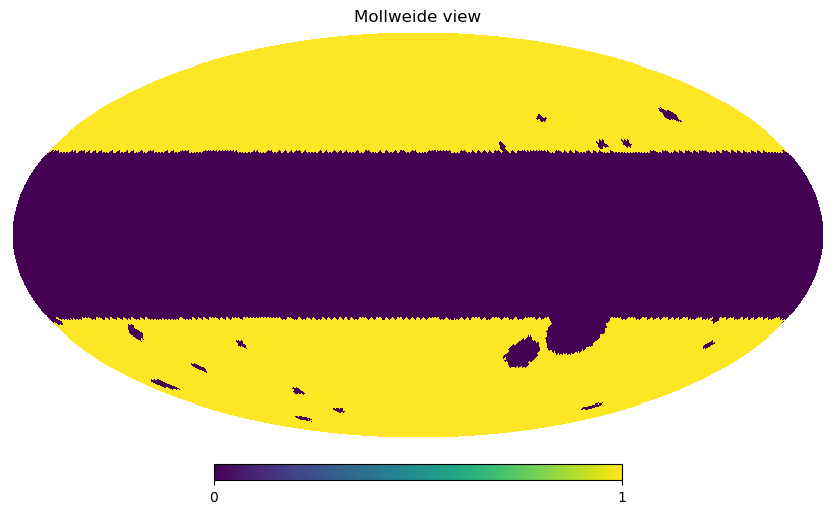

In [9]:
hp.mollview(topcatmask)

#### check results with different masks

0.0
amp = 0.029250
direction:  <SkyCoord (Galactic): (l, b) in deg
    (237.47933777, 11.7205834)>
0.2
amp = 0.018785
direction:  <SkyCoord (Galactic): (l, b) in deg
    (238.12057551, 21.36892295)>
0.5
amp = 0.015561
direction:  <SkyCoord (Galactic): (l, b) in deg
    (238.62676511, 27.77056005)>
1.0
amp = 0.014989
direction:  <SkyCoord (Galactic): (l, b) in deg
    (240.29851794, 28.95729055)>
1.5
amp = 0.014734
direction:  <SkyCoord (Galactic): (l, b) in deg
    (242.16540772, 28.27219581)>
2.0
amp = 0.014885
direction:  <SkyCoord (Galactic): (l, b) in deg
    (243.44623508, 26.98606477)>


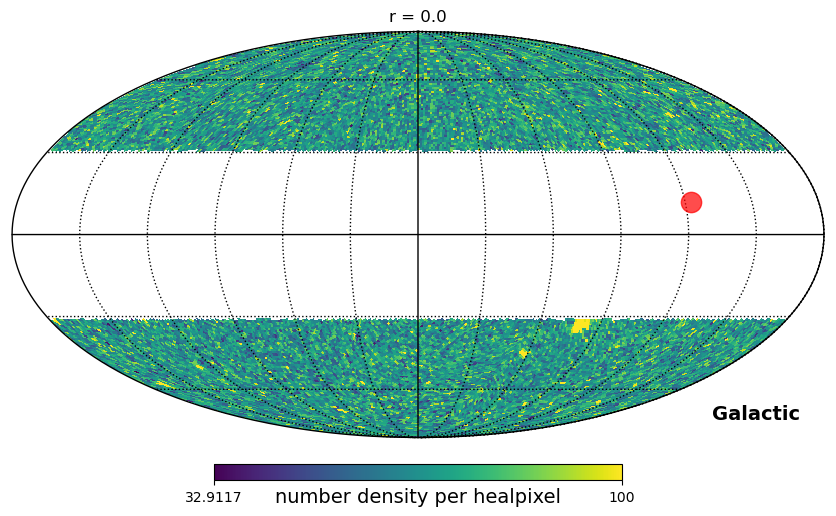

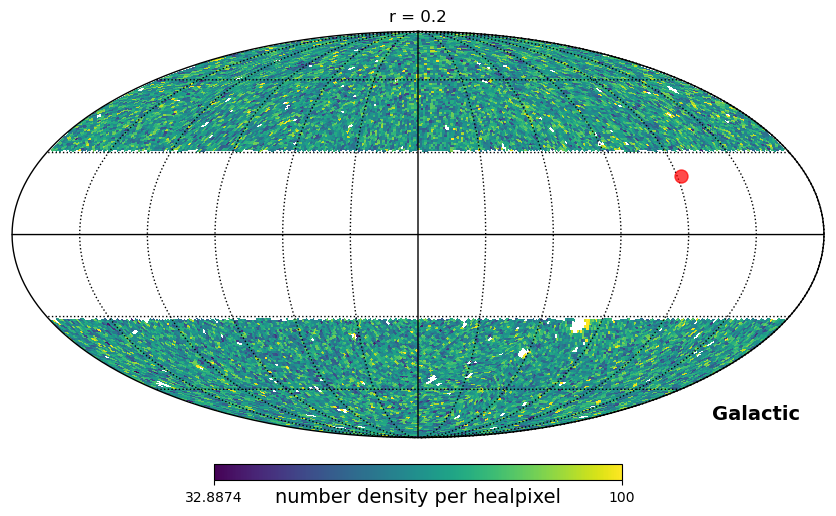

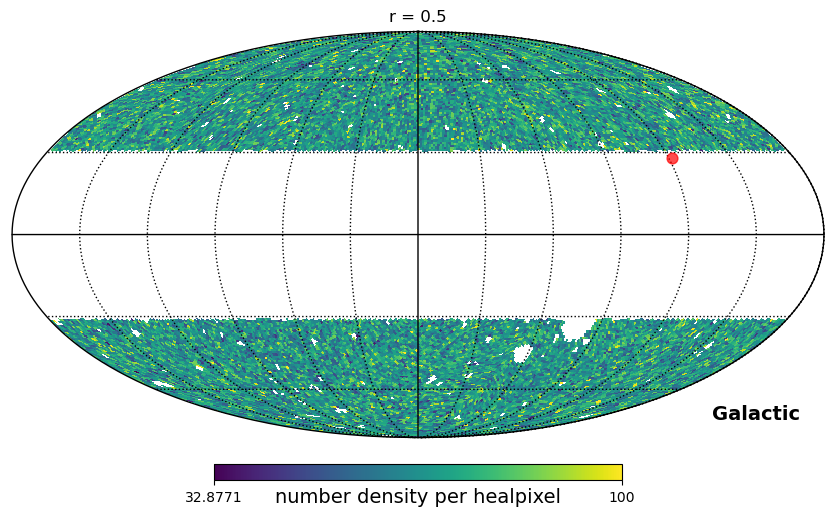

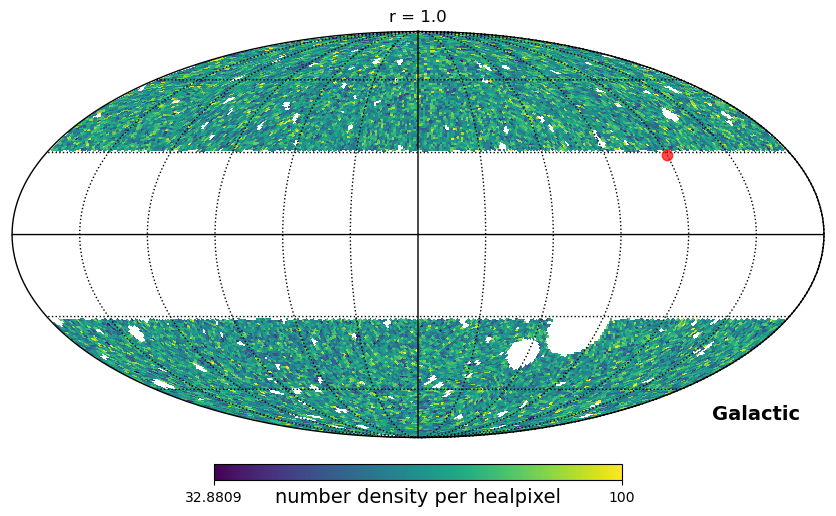

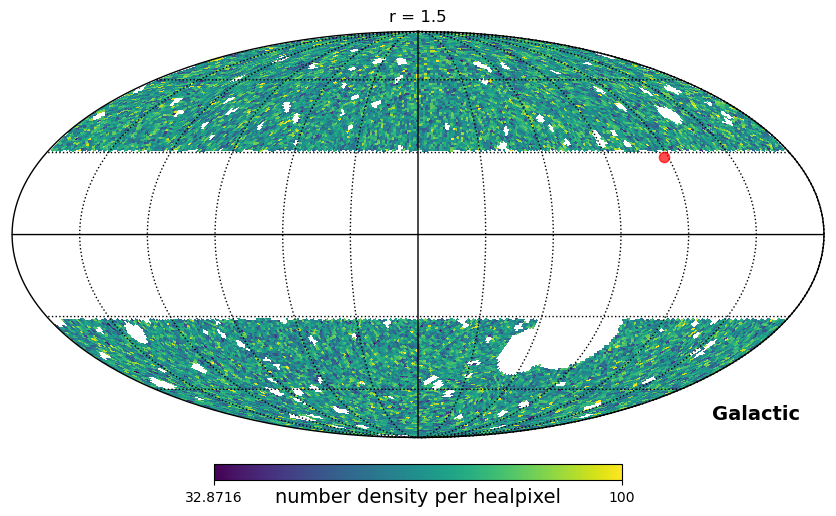

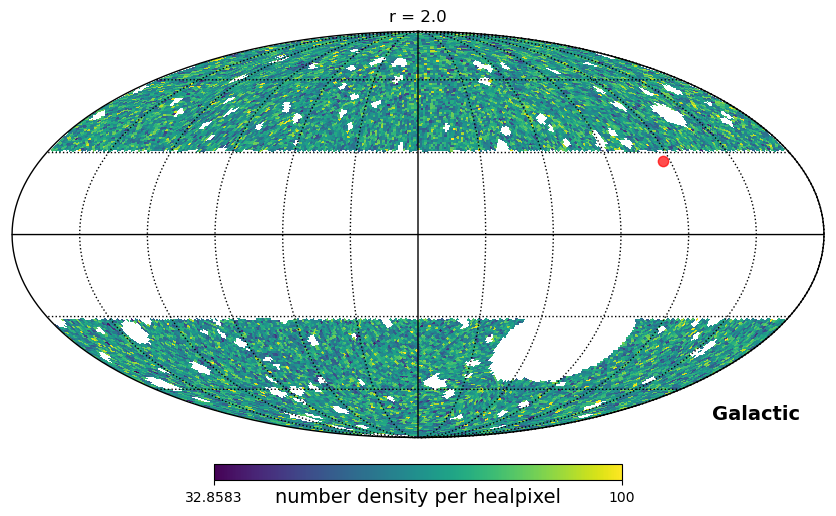

In [14]:
from Secrest_dipole import SecrestDipole

factors = [0., 0.2, 0.5, 1., 1.5, 2.]
for i, factor in enumerate(factors):
    print(factor)
    d = SecrestDipole(catname='catwise_agns', mag='w1', maglim=16.4, maskfactor=factor, blim=30, load_init=False)
    map_ = d.load_hpxelatcorr()
    dipamp, dipdir = d.compute_dipole(map_, verbose=True)
    d.plot_map(map_, coord=['C','G'], max=100, title=f'r = {factor}')
    d.plot_dipole(dipdir, marker='o', ms=500*dipamp, color='r', alpha=0.7)